# Model Evaluation

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Load Data

In [12]:
df = pd.read_csv("../data/processed/cars_cleaned.csv")

X = df.drop("price", axis=1)
y = df["price"]

Recreate Train/Test Split

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Load Trained CatBoost Model

In [14]:
model = joblib.load("../models/catboost_model.pkl")

Make Predictions

In [15]:
y_pred = model.predict(X_test)

Calculate Metrics

In [16]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)


MAE: 1645052.9431689826
RMSE: 3569430.4134868546
R2: 0.9500022683888186


Actual vs Predicted Plot

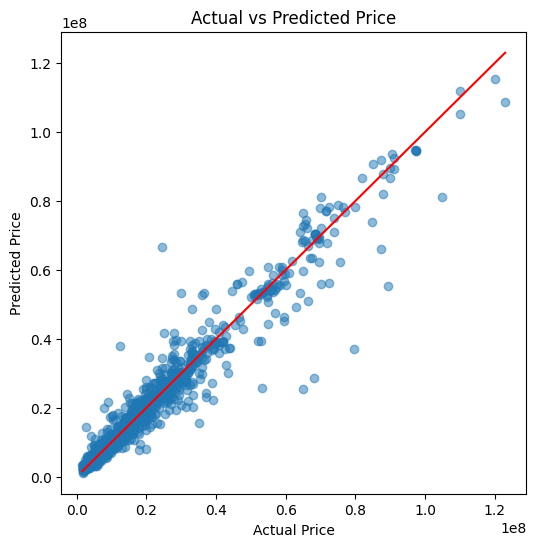

In [17]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red")
plt.show()

Residual Plot

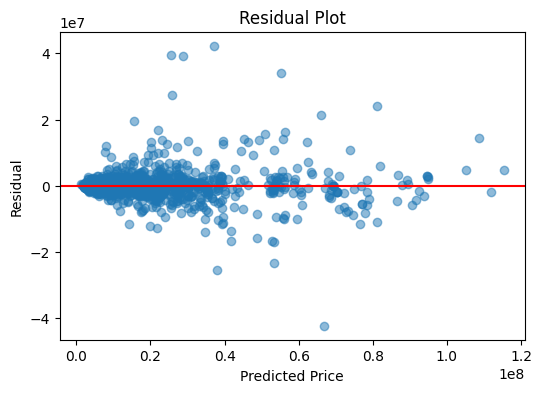

In [18]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red')
plt.xlabel("Predicted Price")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()

Residual Distribution

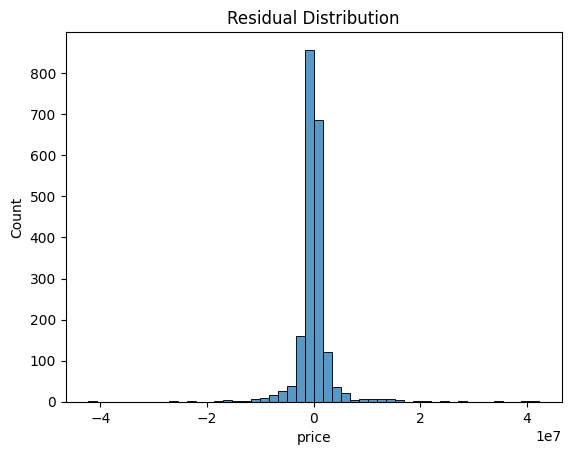

In [19]:
sns.histplot(residuals, bins=50)
plt.title("Residual Distribution")
plt.show()